In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.model_selection import train_test_split
import os 
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
plt.style.use('ggplot')
baseurl = r"C:\Users\Benwari Ezekiel\Documents\code\house-prices-advanced-regression-techniques"
file= 'train.csv'
filepath= os.path.join(baseurl,file)


In [70]:
df= pd.read_csv(filepath)
df.shape 
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [71]:
df['number of bathrooms']= df['HalfBath']*0.5 + df['BsmtFullBath'] + df['BsmtHalfBath']*0.5 +df['FullBath']
x= df[['number of bathrooms','LotArea','BedroomAbvGr']]
#print(x)
x1 =np.array(x)
y = df['SalePrice']
y = pd.DataFrame(y)
y1 = np.array(y)


<Figure size 1800x800 with 0 Axes>

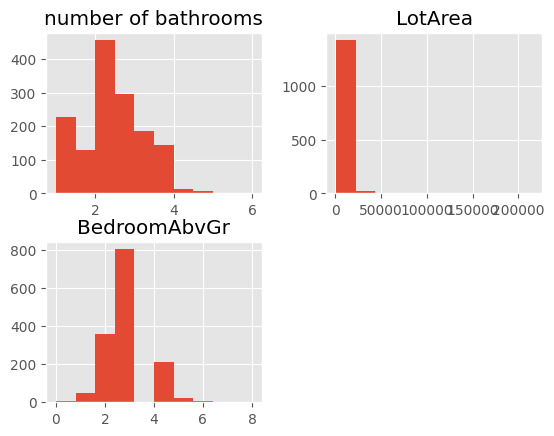

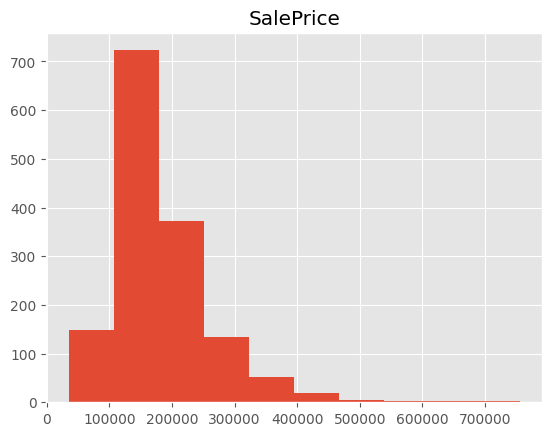

In [72]:
plt.figure(figsize=(18,8))
x.hist()
#print(y)
y.hist()
plt.show()

In [73]:
scaler = StandardScaler()
x1= scaler.fit_transform(x1)
y1= scaler.fit_transform(y1)
x_train, x_test, y_train, y_test = train_test_split(x1,y1,test_size=0.2,random_state=42)

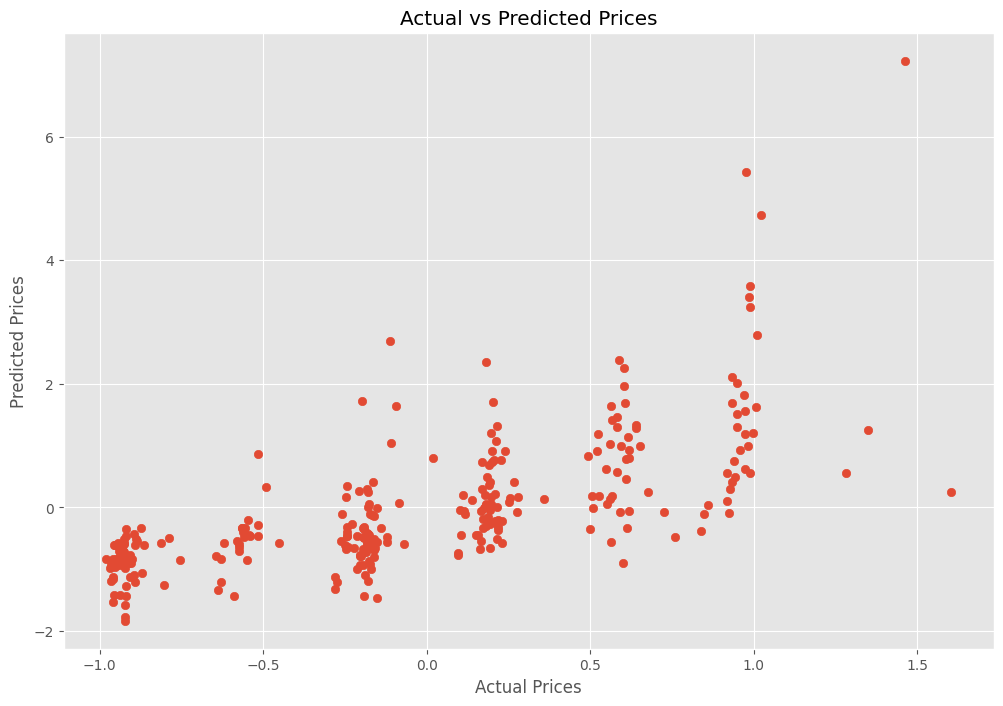

In [76]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
plt.figure(figsize=(12,8))
plt.scatter(y_pred,y_test,)
plt.xlabel('Actual Prices')  # Label the x-axis.
plt.ylabel('Predicted Prices')  # Label the y-axis.
plt.title('Actual vs Predicted Prices')  # Set the title of the plot.
plt.show()



In [81]:



mse = mean_squared_error(y_test,y_pred)
print(f'the mean sqaured error is {mse}')

the mean sqaured error is 0.6645068324627108


In [82]:
import pickle 
pick_in= open('linear_regression_model2.sav','wb')
pickle.dump(model,pick_in)